# <center> Udemy Insights Analyzing Courses, Pricing, & Subscribers <center>

![Udemy Poster](Udemy_poster.jpg)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import plotly.offline as py
pd.options.plotting.backend = "plotly"
py.init_notebook_mode(connected=True)
pd.set_option('display.max_colwidth', 50)
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("udemy_courses.csv")

In [6]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [7]:
def missing_plot(dataset):
    null_feat = pd.DataFrame(dataset.isnull().sum(),columns=['Count'])
    null_percentage = pd.DataFrame(dataset.isnull().sum()/len(dataset),columns=['Count'])

    trace = go.Bar(x= null_feat.index, y = null_feat['Count'],opacity=0.8,
                  text = null_feat['Count'],textposition='auto',
                  marker=dict(color = '#D84E5F',
                             line = dict(color = '#000000',width = 1.5)))
    layout = dict(height=600,width = 1000,title = 'Missing values analysis by Barplot',template='plotly_dark')
    
    fig = dict(data=[trace], layout= layout)
    
    py.iplot(fig)

def check(df_):
    print('SHAPE'.center(60,'*'))
    print('OBSERVATIONS -------->{}'.format(df_.shape[0]))
    print('FEATURES -------->{}'.format(df_.shape[1]))
    print('TYPES OF FETAURES'.center(60,'*'))
    print(df_.dtypes,'\n')
    print('Duplicate Values Analysis'.center(60,'*'))
    print('\n',df_.duplicated().sum(),'\n')
    print(''.center(60,'*'))

***************************SHAPE****************************
OBSERVATIONS -------->3678
FEATURES -------->12
*********************TYPES OF FETAURES**********************
course_id                int64
course_title            object
url                     object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object 

*****************Duplicate Values Analysis******************

 6 

************************************************************


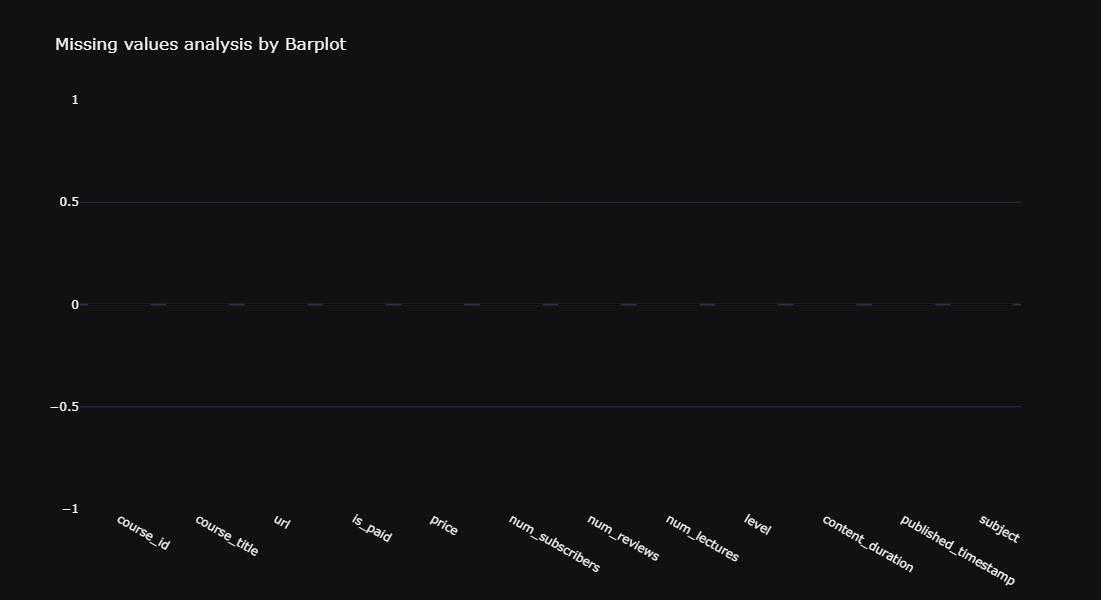

In [8]:
check(df)
missing_plot(df)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
course_id,3678.0,675971.963295,343273.156040,8324.0,407692.5,687917.0,961355.50,1282064.0
price,3678.0,66.049483,61.005755,0.0,20.0,45.0,95.00,200.0
num_subscribers,3678.0,3197.150625,9504.117010,0.0,111.0,911.5,2546.00,268923.0
num_reviews,3678.0,156.259108,935.452044,0.0,4.0,18.0,67.00,27445.0
num_lectures,3678.0,40.108755,50.383346,0.0,15.0,25.0,45.75,779.0
content_duration,3678.0,4.094517,6.053840,0.0,1.0,2.0,4.50,78.5


### Data Cleaning

In [11]:
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

In [12]:
df['Year'] = df['published_timestamp'].dt.year
df['Month'] = df['published_timestamp'].dt.month
df['Day'] = df['published_timestamp'].dt.day

## Exploratory Data Analysis

### Univariate Analysis

  - How many courses are there in each subject ?

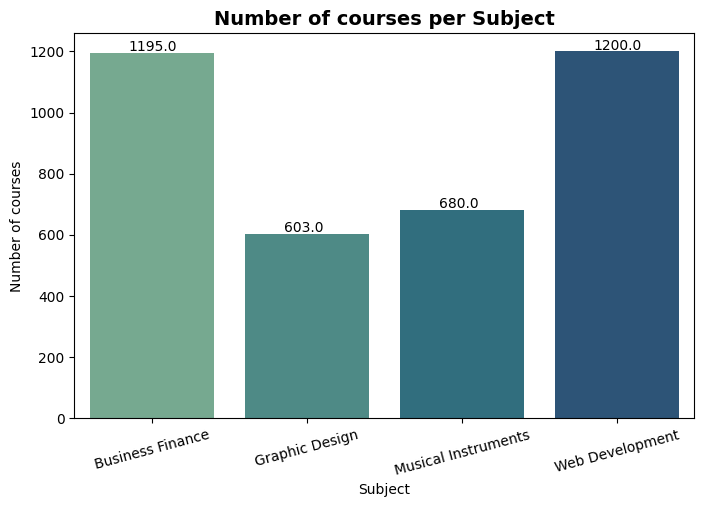

In [16]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x=df['subject'],palette="crest" )
plt.title("Number of courses per Subject", fontsize=14, fontweight='bold')
plt.xlabel("Subject")
plt.ylabel("Number of courses")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.25, p.get_height()+7), fontsize=10)

plt.xticks(rotation=15)
plt.show()

In [17]:
subject_count = df['subject'].value_counts().reset_index()
subject_count.columns = ['Subject','Course_Count']

fig = px.bar(subject_count,
            x = 'Subject',
            y = 'Course_Count',
            color= 'Subject',
            text_auto= True,
            title= "Number of courses per Subject")

fig.update_traces(textposition = 'outside')

fig.update_layout(
    xaxis_title = "Subject Name",
    title_x = 0.5,
    yaxis_title = "No. of Courses",
    title_font_size = 18,
    template = 'plotly_dark',
    height = 600,
    width = 800,
    showlegend = False
)

fig.show()

In [18]:
paid_count = df['is_paid'].value_counts().reset_index()
paid_count.columns = ['is_paid','Course_Count']



fig = px.bar(paid_count,
            x = 'is_paid',
            y = 'Course_Count',
            color= 'is_paid',
            text_auto= True,
            title= "Paid v/s Free Courses")

fig.update_traces(textposition = 'outside')

fig.update_layout(
    xaxis_title = "Course Type",
    title_x = 0.5,
    yaxis_title = "No. of Courses",
    title_font_size = 18,
    template = 'plotly_dark',
    height = 600,
    width = 800,
    showlegend = False
)

fig.show()

In [19]:
paid_courses = df[df['price'] > 0]

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x = paid_courses['price'],
        nbinsx = 40,
        name= "Price Distribution",
        marker_color = 'skyblue',
        opacity= 0.7
    )
)



fig.update_layout(
    xaxis_title = "Price ($)",
    title_x = 0.5,
    yaxis_title = "No. of Courses",
    title_font_size = 18,
    template = 'plotly_dark',
    bargap = 0.05,
    height = 600,
    width = 800,
    showlegend = False
)

fig.show()

- Most courses are between 20 to 50 dollars.

In [21]:
df['level'].value_counts()

level
All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64

In [22]:
level_count = df['level'].value_counts().reset_index()
level_count.columns = ['Level','Count']



fig = px.pie(level_count,
            names = 'Level',
            values= 'Count',
            color= 'Level',
            color_discrete_sequence = px.colors.qualitative.Set3,
            hole = 0.5,
            title= "Level-wise Course Distribution")


fig.update_traces(textposition = 'outside')

fig.update_layout(
    title_x = 0.2,
    title_font_size = 18,
    template = 'plotly_dark',
    height = 500,
    width = 600,
    showlegend = True
)

fig.show()

## Bivariate Analysis

  - Avearge Price by Subject

In [25]:
avg_price = df.groupby('subject')['price'].mean().reset_index()

fig = px.bar(avg_price,
            x = 'subject',
            y = 'price',
            color= 'subject',
            color_discrete_sequence = px.colors.qualitative.Set2,
            text_auto= True,
            title= "Average Course by Subject")
fig.update_traces(textposition = 'outside')

fig.update_layout(
    xaxis_title = 'Subject',
    yaxis_title = 'Average Price ($)',
    title_x = 0.5,
    title_font_size = 18,
    template = 'plotly_dark',
    height = 600,
    width = 800,
    showlegend = False
)

fig.show()

  - How many levels per subject ?

In [27]:
level_counts = df.groupby(['subject','level']).size().reset_index(name='Count')

fig = px.bar(
    level_counts,
    x = 'subject',
    y = 'Count',
    color= 'level',
    text_auto= True,
    barmode= 'group',
    title= 'Level count per Subject',
    color_discrete_sequence = px.colors.qualitative.Set2
)

fig.update_traces(textposition = 'outside')


fig.update_layout(
    xaxis_title = 'Subject',
    yaxis_title = 'No. of courses',
    legend_title = 'Course Level',
    title_x = 0.3,
    title_font_size = 18,
    template = 'plotly_dark',
    height = 600,
    width = 800
)

fig.show()

  - Number of reviews per levels per Subject.

In [29]:
reviews_per_level_subject = df.groupby(['subject','level'])['num_reviews'].sum().reset_index()


fig = px.bar(
    reviews_per_level_subject,
    x = 'subject',
    y = 'num_reviews',
    color= 'level',
    barmode= 'group',
    title= 'No. of reviews per level per Subject',
    color_discrete_sequence = px.colors.qualitative.Set2
)


fig.update_layout(
    xaxis_title = 'Subject',
    yaxis_title = 'Total No. of Reviews',
    legend_title = 'Course Level',
    title_x = 0.2,
    title_font_size = 18,
    template = 'plotly_dark',
    height = 600,
    width = 800
)

fig.show()

  - Number of Lectures per levels per Subject.

In [31]:
lecture_per_level_subject = df.groupby(['subject','level'])['num_lectures'].sum().reset_index()


fig = px.bar(
    lecture_per_level_subject,
    x = 'subject',
    y = 'num_lectures',
    text_auto=True,
    color= 'level',
    barmode= 'group',
    title= 'No. of Lectures per level per Subject',
    color_discrete_sequence = px.colors.qualitative.Set2
)

fig.update_traces(textposition = 'outside', textangle = 90)


fig.update_layout(
    xaxis_title = 'Subject',
    yaxis_title = 'Total No. of Lectures',
    legend_title = 'Course Level',
    title_x = 0.2,
    title_font_size = 18,
    template = 'plotly_dark',
    height = 600,
    width = 800
)

fig.show()

  - How many courses Paid/Free course in each Subject?

In [33]:
paid_per_level_subject = df.groupby(['subject','is_paid']).size().reset_index(name = 'Count')

fig = px.bar(
    paid_per_level_subject,
    x = 'subject',
    y = 'Count',
    color= 'is_paid',
    text_auto= True,
    barmode= 'group',
    title= 'Paid/Free count per Subject',
    color_discrete_sequence = px.colors.qualitative.Set2
)


fig.update_traces(textposition = 'outside')


fig.update_layout(
    xaxis_title = 'Subject',
    yaxis_title = 'Paid/Free Count',
    legend_title = 'Paid(True) / Free(False)',
    title_x = 0.3,
    title_font_size = 18,
    template = 'plotly_dark',
    height = 600,
    width = 800
)

fig.show()

  - What is the maximum and minimum price per Subject?

  - How much revenue generated ?

In [36]:
paid_courses['estimated_profit'] = paid_courses['price'] * paid_courses['num_subscribers']

print(f"Total Revenue Generated = ${paid_courses['estimated_profit'].sum()}")

Total Revenue Generated = $884921315


  - How much revenue generated from each subject?

In [38]:
subject_revenue = paid_courses.groupby(['subject'])['estimated_profit'].sum().reset_index()

In [39]:
fig = px.bar(
    subject_revenue,
    x = 'subject',
    y = 'estimated_profit',
    text = 'estimated_profit',
    color= 'estimated_profit',
    title= 'Estimated Udemy Earnings by Subject',
    color_continuous_scale= 'Brwnyl'
)

fig.update_traces(texttemplate = '$%{text:,.0f}',textposition = 'outside')


fig.update_layout(
    xaxis_title = 'Subject',
    yaxis_title = 'Estimated Revenue',
    title_x = 0.5,
    title_font_size = 18,
    template = 'plotly_dark',
    coloraxis_showscale = False,
    height = 600,
    width = 800
)

fig.show()

  - Top 5 Most famous Course Title.

In [41]:
top_courses = df[['course_title','num_subscribers']].sort_values(by='num_subscribers',ascending=False).head(5)

In [42]:
fig = px.bar(
    top_courses,
    x = 'num_subscribers',
    y = 'course_title',
    orientation= 'h',
    text = 'num_subscribers',
    color= 'num_subscribers',
    title= 'Top 5 Most Famous Udemy Courses',
    color_continuous_scale= 'algae'
)

fig.update_traces(texttemplate = '%{text:,.0f}',textposition = 'outside')


fig.update_layout(
    xaxis_title = 'No. of Subscribers',
    yaxis_title = 'Course Title',
    title_x = 0.5,
    title_font_size = 18,
    template = 'plotly_dark',
    coloraxis_showscale = False,
    height = 600,
    width = 900
)

fig.show()

  - What is the total number of courses in each year?

In [44]:
Courses_per_year = df['Year'].value_counts().sort_index().reset_index()
Courses_per_year.columns = ['Year','Total Courses']

Courses_per_year

,Year,Total Courses
0,2011,5
1,2012,45
2,2013,202
3,2014,491
4,2015,1014
5,2016,1206
6,2017,715


In [45]:
fig = px.line(
    Courses_per_year,
    x = 'Year',
    y = 'Total Courses',
    markers=True,
    title= 'Total Number of Courses Published in Each Year'
)

fig.update_traces(
    line = dict(color= 'deepskyblue', width=3),
    marker = dict(size= 8, color='orange', symbol='circle')
)

fig.update_layout(
    xaxis_title = 'Year',
    yaxis_title = 'No. of Courses',
    title_x = 0.5,
    font = dict(family= 'Arial', size = 14),
    title_font = dict(size = 20, family = 'Arial Black'),
    template = 'plotly_dark',
    hovermode = 'x unified',
    margin = dict(l=60, r=40, t=60, b=60),
    height = 600,
    width= 800
)

  - What is the number of Subscribers Per Year?

In [47]:
subscribers_per_year = df.groupby('Year')['num_subscribers'].sum().reset_index()
subscribers_per_year.columns = ['Year','Total Subscribers']

In [48]:
fig = px.line(
    subscribers_per_year,
    x = 'Year',
    y = 'Total Subscribers',
    markers=True,
    text = 'Total Subscribers',
    title= 'Total Number of Subscribers Published in Each Year'
)


fig.update_traces(
    line = dict(color= 'gold', width=3),
    marker = dict(size= 8, color='red', symbol='circle'),
    textposition = 'top left'
)

fig.update_layout(
    xaxis_title = 'Year',
    yaxis_title = 'Subscribers',
    title_x = 0.5,
    font = dict(family= 'Arial', size = 14),
    title_font = dict(size = 20, family = 'Arial Black'),
    template = 'plotly_dark',
    hovermode = 'x unified',
    margin = dict(l=60, r=40, t=60, b=60),
    height = 600,
    width= 800
)

  - Number of Subscription per Year per Subject Category.

In [50]:
Subscribers_per_sub_cat = df.groupby(['Year','subject'])['num_subscribers'].sum().reset_index()
Subscribers_per_sub_cat.columns = ['Year','Subject','Total Subscribers']

fig = px.line(
    Subscribers_per_sub_cat,
    x = 'Year',
    y = 'Total Subscribers',
    color= 'Subject',
    markers=True,
    title= 'Total Number of Subscribers Per Year by Subject Category',
    color_discrete_sequence = px.colors.qualitative.Vivid
)


fig.update_traces(
    line = dict(width=2),
    marker = dict(size= 8,symbol='circle')
)

fig.update_layout(
    xaxis_title = 'Year',
    yaxis_title = 'Total Subscribers',
    title_x = 0.5,
    font = dict(family= 'Arial', size = 14),
    title_font = dict(size = 20, family = 'Arial Black'),
    template = 'plotly_dark',
    hovermode = 'x unified',
    margin = dict(l=60, r=40, t=60, b=60),
    height = 600,
    width= 800
)

fig.show()

  - Which Year has the Highest and Lowest Profit?

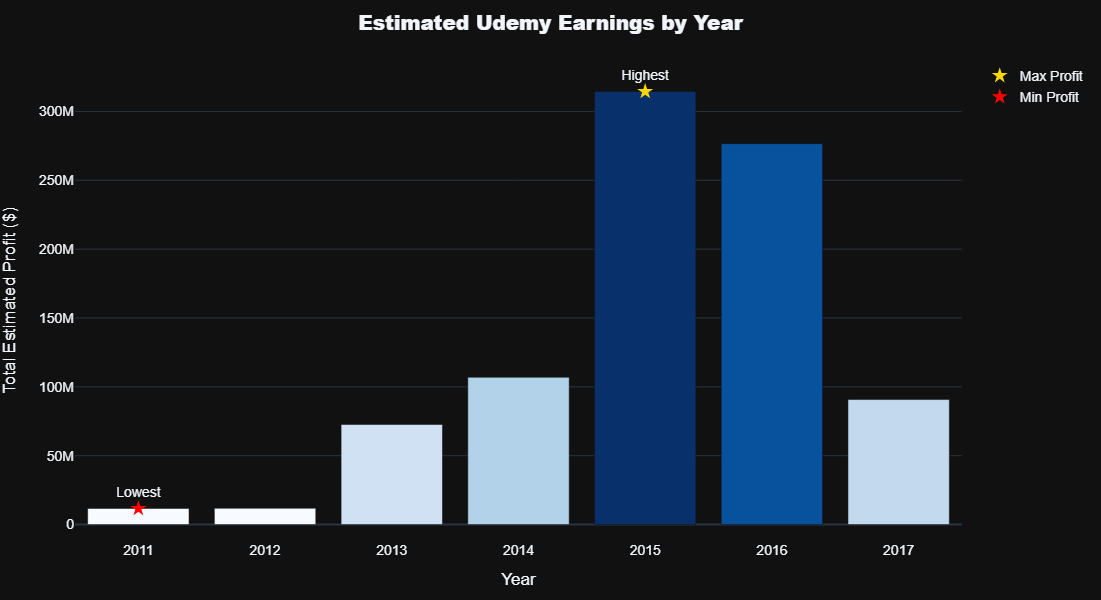

In [52]:
paid_sub = df[df['price']>0]
paid_sub['estimated_profit'] = paid_sub['price'] * paid_sub['num_subscribers']

profit_by_year = paid_sub.groupby('Year')['estimated_profit'].sum().reset_index()
profit_by_year.columns = ['Year','Estimated Profit']

max_profit = profit_by_year.loc[profit_by_year['Estimated Profit'].idxmax()]
min_profit = profit_by_year.loc[profit_by_year['Estimated Profit'].idxmin()]



fig = px.bar(
    profit_by_year,
    x = 'Year',
    y = 'Estimated Profit',
    color= 'Estimated Profit',
    title= 'Estimated Udemy Earnings by Year',
    color_continuous_scale= 'Blues'
)


fig.add_scatter(
    x = [max_profit['Year']],
    y = [max_profit['Estimated Profit']],
    mode = 'markers+text',
    marker = dict(size= 12, color='gold', symbol='star'),
    text = 'Highest',
    textposition = 'top center',
    name = 'Max Profit'
)

fig.add_scatter(
    x = [min_profit['Year']],
    y = [min_profit['Estimated Profit']],
    mode = 'markers+text',
    marker = dict(size= 12, color='red', symbol='star'),
    text = 'Lowest',
    textposition = 'top center',
    name = 'Min Profit'
)

fig.update_layout(
    xaxis_title = 'Year',
    yaxis_title = 'Total Estimated Profit ($)',
    title_x = 0.5,
    font = dict(family= 'Arial', size = 14),
    title_font = dict(size = 20, family = 'Arial Black'),
    template = 'plotly_dark',
    hovermode = 'x unified',
    coloraxis_showscale = False,
    margin = dict(l=60, r=40, t=60, b=60),
    height = 600,
    width= 800
)

fig.show()

# 📊 Business Insights:

### 1. **Course Distribution Insights**:
- **Web Development** and **Business Finance** dominate the platform with the highest number of courses (~1200 each).
- **Musical Instruments** and **Graphic Design** have significantly fewer courses, suggesting potential areas for expansion if aligned with market demand.

### 2. **Free vs Paid Courses**:
- **Paid Courses** are heavily dominating (3368 courses) compared to **Free Courses** (310 courses).
- Udemy’s strategy is clearly **monetization-focused**, but offering more free courses could attract new learners into the paid ecosystem.

### 3. **Price Distribution**:
- Majority of courses are priced at **`$20`** and **`$50`**.
- **High-priced courses ($100-$200)** are fewer but still present, hinting at premium advanced content offerings.

### 4. **Level of Courses**:
- **"All Levels"** is the most common (1929 courses), followed by **Beginner Level**.
- There are relatively **few Expert Level** courses (only 58), suggesting a **gap for advanced users** that Udemy could tap into.

### 5. **Subject-wise Average Pricing**:
- **Web Development** courses have the highest average price (`$77.03`).
- **Musical Instruments** courses are the cheapest on average ($49.55).

### 6. **Course Level vs Subject**:
- **Business Finance** and **Web Development** have a good mix across all levels.
- **Musical Instruments** focuses more heavily on **Beginner Level**.

### 7. **Review and Engagement Insights**:
- **Web Development** alone generated **over 470k reviews** — highlighting it as the **most engaging and demanded field**.
- **Business Finance** and **Graphic Design** have good engagement but much lower compared to Web Development.

### 8. **Lecture Content**:
- **Web Development** courses are **very rich in content**, with over **60,000 lectures** in total, emphasizing course depth.
- **Musical Instruments** also shows strong content volume relative to course count.

### 9. **Free vs Paid Distribution by Subject**:
- **Web Development** and **Business Finance** have a higher share of paid courses compared to free ones, which helps revenue generation.

### 10. **Price Range by Subject**:
- All subjects have courses priced between **`$20 - $200`**.
- Udemy maintains a **consistent premium pricing strategy** across different subjects.

---

# 💰 Revenue and Profit Insights:

### 11. **Total Revenue**:
- Udemy generated a massive **$884,921,315** from the dataset.

### 12. **Subject-wise Profit**:
- **Web Development** alone contributed **~71%** of total revenue (~$630M).
- **Business Finance** is the second-highest contributor.

### 13. **Top 5 Famous Courses**:
- Courses like **"Learn HTML5 Programming From Scratch"** and **"The Web Developer Bootcamp"** are extremely popular, attracting **over 100,000+ subscribers** each.
- Web development skills are clearly the **most in-demand**.

---

# 📈 Year-wise Growth Insights:

### 14. **Course Creation Trends**:
- Explosive growth from **2013 to 2016**, with peak new courses created in **2016 (1206 courses)**.
- After 2016, the number of new courses started declining slightly (only 715 in 2017).

### 15. **Subscriber Growth**:
- Subscriber numbers grew **massively year over year**, peaking around **2015-2016**.
- Indicates **Udemy’s golden growth phase** was between **2014–2016**.

### 16. **Profit by Year**:
- **2015** was the **highest profit year `($314M)`**.
- **2011** was the lowest ($11M), indicating the platform’s successful scaling over a few years.

### 17. **Subject-wise Subscriber Trends per Year**:
- **Web Development** consistently dominated subscriber numbers every year.
- Other subjects like **Business Finance** and **Graphic Design** contributed but were far behind.

---

# 📜 Final Conclusion:

> **Udemy's success is heavily driven by its dominance in Web Development courses, premium pricing strategy, and consistent expansion during the early to mid-2010s.**  
>  
> The platform demonstrates a clear focus on beginner and all-level content, with paid courses being the core revenue model.  
>  
> However, there are **opportunities** to:
> - Expand expert-level and free course offerings.
> - Diversify revenue streams beyond Web Development into growing categories like Business Finance or Musical Instruments.
> - Reignite course creation momentum post-2016 slowdown.

---